# Lab 1

## Basic idea for gradient descent
### Not logistic regression classifier

In [153]:
def neuron(input, weights):
    out = 0
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out

# 
def ele_mul(scalar, vector):
    out = [0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out

In [154]:
feature1 = [8.5, 9.5, 9.9, 9.0]
feature2 = [0.65, 0.8, 0.8, 0.9]
feature3 = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]

# y
true = win_or_lose_binary[0]

# Alpha is the learning rate
alpha = 0.01
weights = [0.1, 0.2, -.1]
input = [feature1[0], feature2[0], feature3[0]]

for iter in range(3):
    # yhat
    pred = neuron(input, weights)
    
    # Mean squared loss function
    error = (pred - true) ** 2
    
    # loss calculation
    delta = pred - true
    
    
    weight_deltas = ele_mul(delta, input)
    
    print("Iteration: " + str(iter+1))
    print("Pred: "+ str(pred))
    print("Error: " + str(error))
    print("Delta: " + str(delta))
    print("Weights: " + str(weights))
    print("Weight_Deltas: " + str(weight_deltas))
    print()
    
    for i in range(len(weights)):
        # change the weights by the alpha * how much each weight needs to change
        weights[i] -= alpha*weight_deltas[i]
        

Iteration: 1
Pred: 0.8600000000000001
Error: 0.01959999999999997
Delta: -0.1399999999999999
Weights: [0.1, 0.2, -0.1]
Weight_Deltas: [-1.189999999999999, -0.09099999999999994, -0.16799999999999987]

Iteration: 2
Pred: 0.9637574999999999
Error: 0.0013135188062500048
Delta: -0.036242500000000066
Weights: [0.1119, 0.20091, -0.09832]
Weight_Deltas: [-0.30806125000000056, -0.023557625000000044, -0.04349100000000008]

Iteration: 3
Pred: 0.9906177228125002
Error: 8.802712522307997e-05
Delta: -0.009382277187499843
Weights: [0.11498061250000001, 0.20114557625, -0.09788509000000001]
Weight_Deltas: [-0.07974935609374867, -0.006098480171874899, -0.011258732624999811]



## Linear Regression Classifier

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

df = pd.read_csv('diabetes.csv', sep=',', header='infer')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [156]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [157]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [158]:
raw_data = df.to_numpy()

data = np.transpose(raw_data)

data[8] # training labels (Y)
print(data[0])
data.shape

[ 6.  1.  8.  1.  0.  5.  3. 10.  2.  8.  4. 10. 10.  1.  5.  7.  0.  7.
  1.  1.  3.  8.  7.  9. 11. 10.  7.  1. 13.  5.  5.  3.  3.  6. 10.  4.
 11.  9.  2.  4.  3.  7.  7.  9.  7.  0.  1.  2.  7.  7.  1.  1.  5.  8.
  7.  1.  7.  0.  0.  0.  2.  8.  5.  2.  7.  5.  0.  2.  1.  4.  2.  5.
 13.  4.  1.  1.  7.  5.  0.  2.  3.  2.  7.  0.  5.  2. 13.  2. 15.  1.
  1.  4.  7.  4.  2.  6.  2.  1.  6.  1.  1.  1.  0.  1.  2.  1.  1.  4.
  3.  0.  3.  8.  1.  4.  7.  4.  5.  5.  4.  4.  0.  6.  2.  5.  0.  1.
  3.  1.  1.  0.  4.  9.  3.  8.  2.  2.  0.  0.  0.  5.  3.  5.  2. 10.
  4.  0.  9.  2.  5.  2.  1.  4.  9.  1.  8.  7.  2.  1.  2. 17.  4.  7.
  0.  2.  0.  6.  3.  4.  4.  3.  6.  6.  2.  1.  2.  8.  6.  0.  5.  5.
  6.  0.  1.  5.  4.  7.  8.  1.  8.  5.  3.  9.  7. 11.  8.  5.  1.  3.
  4.  4.  0.  1.  0.  2.  6.  5.  8.  5.  1.  7.  2.  0.  7.  0.  9. 12.
  5.  6.  5.  5.  0.  2.  7.  7.  1.  1.  0.  3.  4.  0.  4.  6.  1.  4.
  3.  4.  7.  0.  9.  0.  1.  4.  3.  6.  2.  9. 10

(9, 768)

In [159]:
# Note: slice upper bound is exclusive
raw_training_data = data[:, 0:500]
raw_testing_data = data[:, 500:]

print("Raw 0 col: ", raw_training_data[:, 0])

from sklearn import preprocessing

# training_data = preprocessing.scale(raw_training_data[0:8, :], axis=0) # ~68% BUT not scaled properly
# testing_data = preprocessing.scale(raw_testing_data[0:8, :], axis=0) # ~68%

# https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1
# where each row is a feature
def normalize(row):
    return 2 * ((row - min(row)) / (max(row) - min(row))) - 1

# init empty training data
training_data = np.empty((0, 500), float)

print("-------------------------")

for i in range(raw_training_data.shape[0]-1):
    normalized_row = np.array(normalize(raw_training_data[i]))
    print(normalized_row[0:10])
    print("Min: ", min(normalized_row))
    print("Max: ", max(normalized_row))
    training_data = np.append(training_data, [normalized_row], axis=0)
    print("Shape: ", training_data.shape)
    print("-------------------------")
    normalized_row = np.array([])
    
testing_data = np.empty((0, 268), float)

for i in range(raw_testing_data.shape[0]-1):
    normalized_row = np.array(normalize(raw_testing_data[i]))
    testing_data = np.append(testing_data, [normalized_row], axis=0)


# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# training_data = min_max_scaler.fit_transform(raw_training_data[0:8, :]) # ~61%
# testing_data = min_max_scaler.fit_transform(raw_testing_data[0:8, :]) # ~61%

print("Training data size: ", training_data.shape)
print("Testing data size: ", testing_data.shape)
print("Normalized 0 col: ", training_data[:, 0])
# training_data[:, 0]

Raw 0 col:  [  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
-------------------------
[-0.29411765 -0.88235294 -0.05882353 -0.88235294 -1.         -0.41176471
 -0.64705882  0.17647059 -0.76470588 -0.05882353]
Min:  -1.0
Max:  1.0
Shape:  (1, 500)
-------------------------
[ 0.50253807 -0.13705584  0.85786802 -0.0964467   0.39086294  0.17766497
 -0.20812183  0.16751269  1.          0.26903553]
Min:  -1.0
Max:  1.0
Shape:  (2, 500)
-------------------------
[ 0.18032787  0.08196721  0.04918033  0.08196721 -0.3442623   0.21311475
 -0.18032787 -1.          0.14754098  0.57377049]
Min:  -1.0
Max:  1.0
Shape:  (3, 500)
-------------------------
[ 0.11111111 -0.07936508 -1.         -0.26984127  0.11111111 -1.
  0.01587302 -1.          0.42857143 -1.        ]
Min:  -1.0
Max:  1.0
Shape:  (4, 500)
-------------------------
[-1.         -1.         -1.         -0.77777778 -0.60283688 -1.
 -0.79196217 -1.          0.28368794 -1.        ]
Min:  -1.0
Max:  1.0
Shape:  (5, 

In [160]:
# debug age normalize and diabetes pedigree function

age = raw_testing_data[7]
age_min = min(age)
age_max = max(age)
age_range = age_max - age_min

print(2 *(0 / 49) -1)

for i in range(len(age)):
    norm_i = 2 * ((age[i] - age_min) / age_range) - 1
    #print(norm_i)

#print(age)

# normalize: 2 * ((row - min(row)) / max(row) - min(row)) - 1



-1.0


In [161]:
for i in range(training_data.shape[0]):
    print("Row: ", i)
    print("Min: ", min(training_data[i]))
    print("Max: ", max(training_data[i]))

Row:  0
Min:  -1.0
Max:  1.0
Row:  1
Min:  -1.0
Max:  1.0
Row:  2
Min:  -1.0
Max:  1.0
Row:  3
Min:  -1.0
Max:  1.0
Row:  4
Min:  -1.0
Max:  1.0
Row:  5
Min:  -1.0
Max:  1.0
Row:  6
Min:  -1.0
Max:  1.0
Row:  7
Min:  -1.0
Max:  1.0


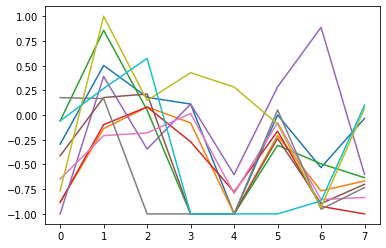

In [162]:
# plot normalised data

plot = pyplot.plot(training_data[:,0:10])



In [242]:
loss_vec = []
def store_loss(loss):
    loss_vec.append(loss)

In [330]:
# sigmoid activation function
def sigmoid(input_vector, weight_vector, bias):
    z = np.dot(input_vector, weight_vector) + bias
    return 1.0 / (1.0 + np.exp(-z))


# loss function
def wierd_broken_loss(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat))

def loss(y, yhat):
    #if yhat == 1.0:
    #    return 1.0
    #if yhat == 0:
    #    return 0.0
    return -(y * np.log(yhat) + (1-y) * np.log(1-yhat))

# From lab sheet tutorial
def loss_other(y, h):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Derivative of sigmoid
def dz_calc(pred, actual):
    return pred - actual
    
def update_dweights(features, dz, derivative_weights):
    for i in range(len(derivative_weights)):
        derivative_weights[i] += features[i] * dz
    return derivative_weights

def update_bias(db, dz):
    db += dz
    return db

# Init random weights and bias
weights = np.random.rand(training_data.shape[0])
initial_weights = weights
bias = np.random.rand(1)

In [331]:
trained_accuracy = []
test_accuracy = []

def test_weights(weights, bias):
    m = testing_data.shape[1]
    good_pred = 0

    for i in range(m):
        features = testing_data[0:8, i]
        # make prediction
        yhat = sigmoid(features, weights, bias)
        #print("Prediction", yhat)
        # get actual value
        y = raw_testing_data[8, i]
        #print("Actual", y)

        #if np.isclose(y, yhat):
        #    print("TRUE")
        #    good_pred += 1
        
        if yhat < 0.5 and y == 0.0:
            good_pred += 1
        elif yhat >= 0.5 and y == 1.0:
            good_pred += 1

    #print("Good predictions: ", good_pred)
    #print("Total predictions: ", m)
    accuracy = good_pred/m*100
    #print(accuracy, "%")
    return accuracy
        
def test_weights_trained(weights, bias):
    m = training_data.shape[1]
    good_pred = 0

    for i in range(m):
        features = training_data[0:8, i]
        # make prediction
        yhat = sigmoid(features, weights, bias)
        #print("Prediction", yhat)
        # get actual value
        y = raw_training_data[8, i]
        #print("Actual", y)

        #if np.isclose(y, yhat):
        #    print("TRUE")
        #    good_pred += 1
        
        if yhat < 0.5 and y == 0.0:
            good_pred += 1
        elif yhat >= 0.5 and y == 1.0:
            good_pred += 1

    #print("Good predictions: ", good_pred)
    #print("Total predictions: ", m)
    
    accuracy = good_pred/m*100
    #print(accuracy, "%")
    return accuracy


### Gradient Descent algorithm from slides

In [333]:

weights = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

my_bias = 0.5

def train_network(iterations, weights, bias):

    # Alpha is step size (learning rate)
    alpha = 0.1

    # m is the amount of training data
    m = training_data.shape[1]

    for j in range(iterations):
        
        # l is the average of all the losses
        l = 0.0
        
        # all derivitive weights and deriviative bias start at 0
        derivative_weights = np.zeros(training_data.shape[0])
        db = 0.0

        for i in range(m):
            # grab features
            features = training_data[0:8, i]
            # make prediction
            yhat = sigmoid(features, weights, bias)
            # get actual value
            y = raw_training_data[8, i]
            # calculate the loss
            l += loss(y, yhat)
            # find the derivative of the activation function
            dz = dz_calc(yhat, y)
            # calculate the deriviative of each weight and the bias
            for k in range(len(derivative_weights)):
                derivative_weights[k] += features[k] * dz
            db += dz

        # Calculate average for loss, derivarive bias, and all derivative weights
        l /= m
        for i in range(len(derivative_weights)):
            derivative_weights[i] /= m
        db /= m
        
        store_loss(l)

        # Update weights with the derivative weight by learning rate
        for i in range(len(weights)):
            weights[i] = weights[i]-alpha*derivative_weights[i]

        bias = bias - alpha*db

        bias_store.append(bias)
        weight_store.append(weights)
        
        trained_accuracy.append(test_weights_trained(weights, bias))
        test_accuracy.append(test_weights(weights, bias))

        if j%1000 == 0:
            print("Weight derivatives: ", derivative_weights)
            print("Weights on iteration ", j, ": ", weights)
            print("Loss: ", l)
        
        elif j == iterations-1:
            print("Weight derivatives: ", derivative_weights)
            print("Weights on iteration ", j+1, ": ", weights)
            print("Loss: ", l)
            print("Bias: ", bias)
        

# clear loss_vec && iterations_vec
loss_vec = []
trained_accuracy = []
test_accuracy = []
weight_store = []
bias_store = []

# 640 optimal iterations
train_network(20, weights, my_bias)
last_train = weights

0.5
Weight derivatives:  [ 0.00852892 -0.05416348  0.00817176  0.04039444  0.03790205 -0.01749953
  0.01844265  0.01556517]
Weights on iteration  0 :  [0.49914711 0.50541635 0.49918282 0.49596056 0.49620979 0.50174995
 0.49815574 0.49844348]
Loss:  0.5887885417654702
0.5042539306820127
0.5082661552959951
0.5120493726994199
0.5156157409260891
0.5189768836240028
0.5221438989014805
0.5251273701784341
0.5279373786799343
0.5305835172477811
0.5330749051822736
0.5354202038604858
0.5376276329089433
0.5397049867376013
0.5416596512684463
0.5434986207159642
0.5452285142982215
0.5468555927765424
0.5483857747388646
0.5498246525569886
Weight derivatives:  [-6.04774987e-03 -4.48230495e-02  1.24690699e-02  2.80849732e-02
  1.39568621e-02 -1.82091601e-02 -4.31979584e-04  1.06375357e-05]
Weights on iteration  20 :  [0.50020453 0.59773174 0.47855705 0.43313998 0.45213052 0.53583886
 0.48521342 0.48729928]
Loss:  0.578308305101792
Bias:  0.5511775079612509


### Accuracy of Test data 

In [327]:
test_weights(weights, my_bias)

66.4179104477612

### Accuracy of Training data

In [324]:

test_weights_trained(weights, bias_store[-1])

77.0

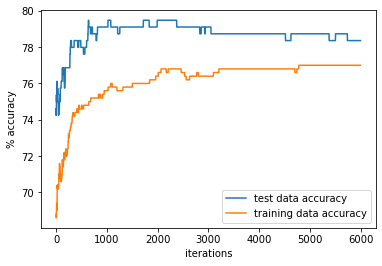

In [312]:
fig, ax = pyplot.subplots()
ax.plot(test_accuracy, label='test data accuracy')
ax.plot(trained_accuracy, label='training data accuracy')
ax.set(xlabel='iterations', ylabel='% accuracy')
pyplot.legend()
pyplot.show()

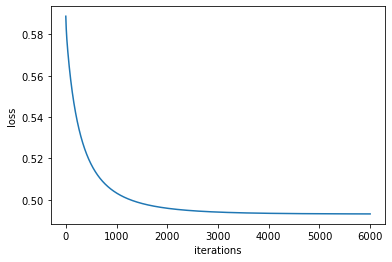

In [313]:
fig, ax = pyplot.subplots()
ax.plot(range(len(loss_vec)), loss_vec)
ax.set(xlabel='iterations', ylabel='loss')
pyplot.show()

In [328]:
max_accu = max(test_accuracy)
print(max_accu)
test_accuracy.index(max_accu)

test_accuracy[-1]

79.47761194029852


78.35820895522389

In [329]:
print(len(weight_store))
print(len(bias_store))

print(weights == weight_store[-1])
print(weights)
print(my_bias == bias_store[-1])
print(my_bias)
print(bias_store[-1])

test_weights(weight_store[-1], bias_store[-1])
test_weights(weights, my_bias)


6000
6000
[ True  True  True  True  True  True  True  True]
[ 0.99163503  3.02480531 -0.58979845 -0.08795829 -0.38323789  3.00718278
  1.0906396   0.14022888]
False
0.5
-0.2535063878714608


66.4179104477612

In [332]:
print(my_bias)

0.5


# Playing with plots

## Equal Width Binning

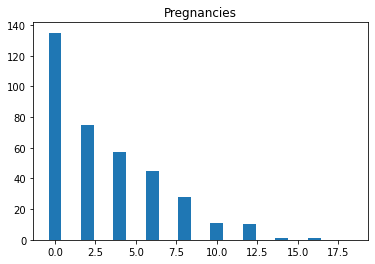

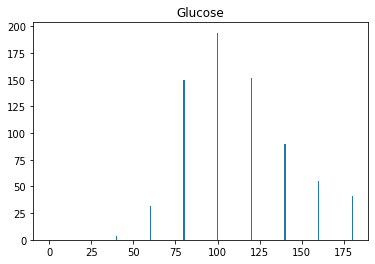

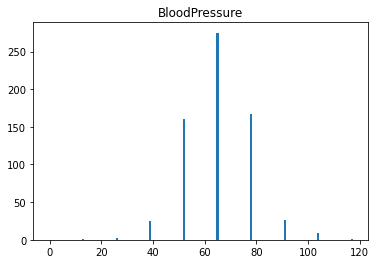

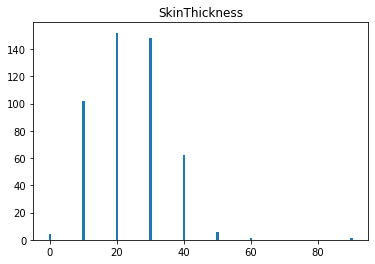

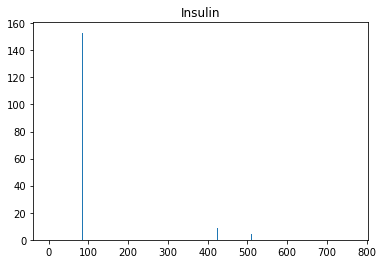

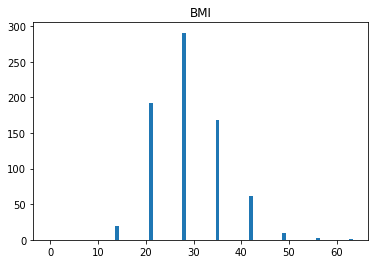

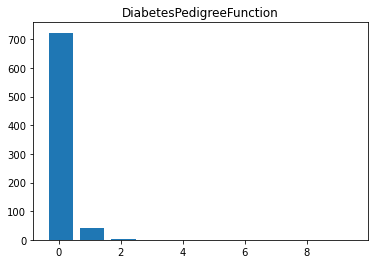

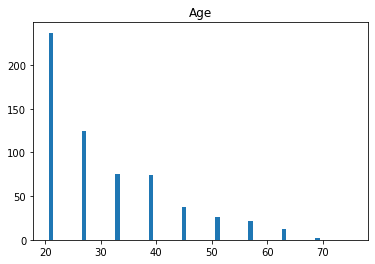

In [295]:
import math

# equal width bins row wise
def ewb_row(row, num_bins): 
    row_len = len(row) 
    w = int(math.ceil((max(row) - min(row)) / num_bins)) 
    min1 = min(row) 
    min_val_arr = [] 
    for i in range(0, num_bins + 1): 
        min_val_arr = min_val_arr + [min1 + w * i] 
    arri=[] 
      
    for i in range(0, num_bins): 
        temp = [] 
        for j in row: 
            if j > min_val_arr[i] and j < min_val_arr[i+1]: 
                temp += [j] 
        arri += [temp] 
    #print(arri)
    return (arri, min_val_arr)



plot_data = np.transpose(raw_data)

for i in range(plot_data.shape[0]-1):
    (row_buckets, min_values) = ewb_row(plot_data[i], 10)
    bucket_size = [len(i) for i in row_buckets]

    # plot each row of bucket sizes
    # print(bucket_size)

    # use for x axis label
    # print(min_values)
    pyplot.figure()
    pyplot.title(df.columns[i])
    pyplot.bar(min_values[0:-1], bucket_size)

pyplot.show()


